In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load the dataset
df = pd.read_csv('../data/Maternal Health Risk Data Set.csv')

print(f"Dataset dimensions: {df.shape}")
print("\nFirst rows:")
print(df.head())
print("\nData types:")
print(df.dtypes)
print("\nMissing values per column:")
print(df.isnull().sum())

Dataset dimensions: (1014, 7)

First rows:
   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.0      98.0         86  high risk
1   35         140           90  13.0      98.0         70  high risk
2   29          90           70   8.0     100.0         80  high risk
3   30         140           85   7.0      98.0         70  high risk
4   35         120           60   6.1      98.0         76   low risk

Data types:
Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object

Missing values per column:
Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64


## Categorical Variables Analysis

In [2]:
# Identify categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical variables:")
print(categorical_cols)
print("\nNumerical variables:")
print(numerical_cols)

# Detailed analysis of categorical variables
if categorical_cols:
    print("\n" + "="*50)
    print("CATEGORICAL VARIABLES ANALYSIS")
    print("="*50)
    for col in categorical_cols:
        print(f"\n{col}:")
        print(f"  Unique values: {df[col].nunique()}")
        print(f"  Values: {df[col].unique()}")
        print(f"\nValue counts:\n{df[col].value_counts()}")
else:
    print("\nNo categorical variables found in the dataset.")

Categorical variables:
['RiskLevel']

Numerical variables:
['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']

CATEGORICAL VARIABLES ANALYSIS

RiskLevel:
  Unique values: 3
  Values: ['high risk' 'low risk' 'mid risk']

Value counts:
RiskLevel
low risk     406
mid risk     336
high risk    272
Name: count, dtype: int64


## Distribution of Variables

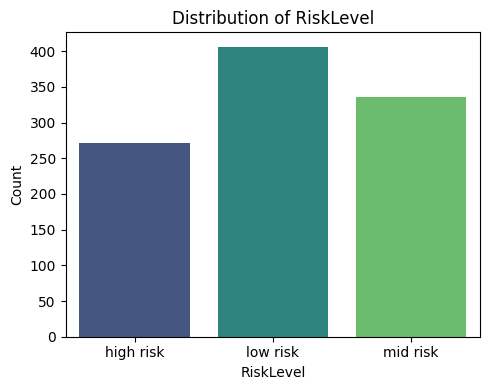

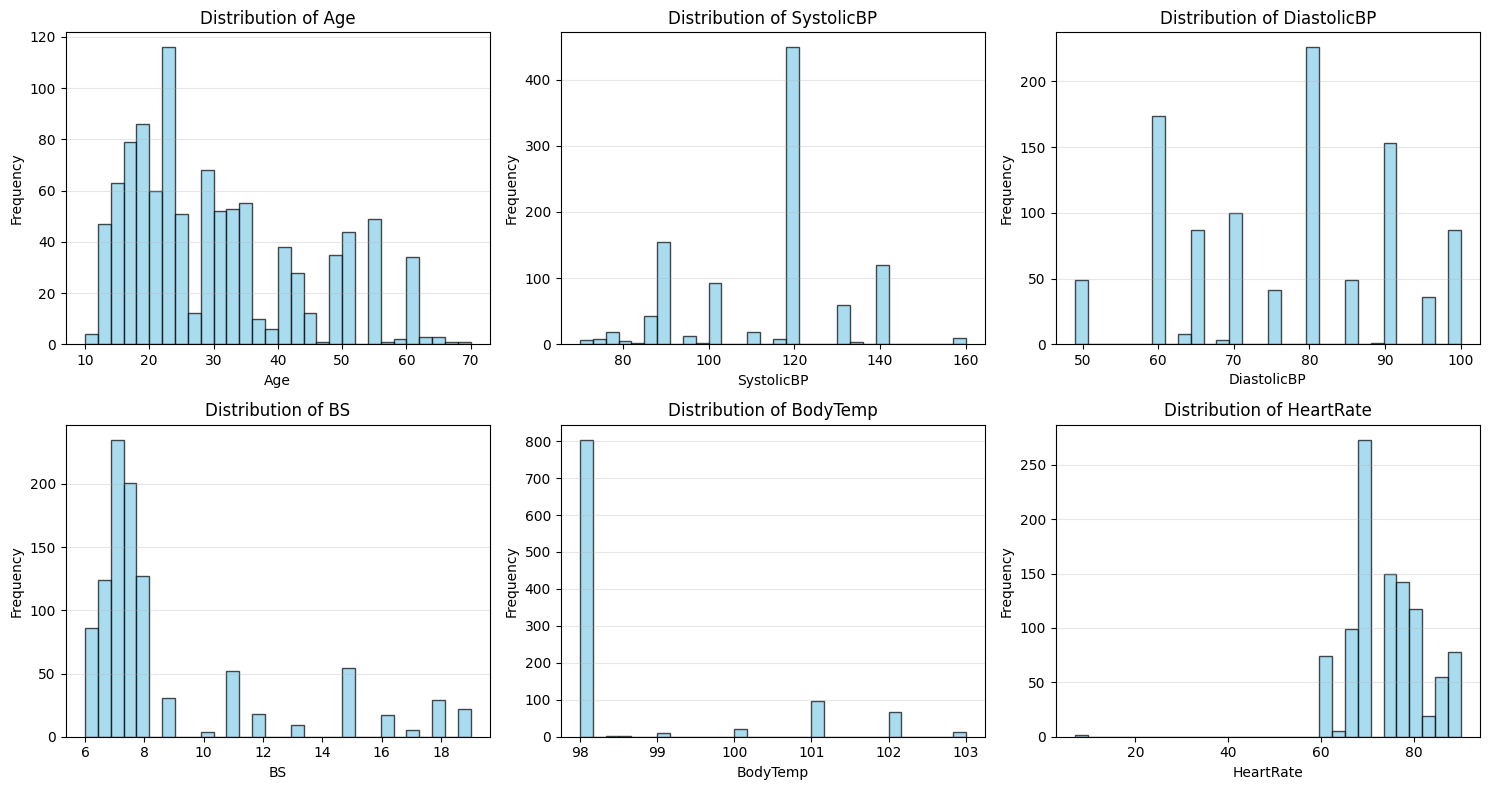


Summary statistics of numerical variables:
               Age   SystolicBP  DiastolicBP           BS     BodyTemp  \
count  1014.000000  1014.000000  1014.000000  1014.000000  1014.000000   
mean     29.871795   113.198225    76.460552     8.725986    98.665089   
std      13.474386    18.403913    13.885796     3.293532     1.371384   
min      10.000000    70.000000    49.000000     6.000000    98.000000   
25%      19.000000   100.000000    65.000000     6.900000    98.000000   
50%      26.000000   120.000000    80.000000     7.500000    98.000000   
75%      39.000000   120.000000    90.000000     8.000000    98.000000   
max      70.000000   160.000000   100.000000    19.000000   103.000000   

         HeartRate  
count  1014.000000  
mean     74.301775  
std       8.088702  
min       7.000000  
25%      70.000000  
50%      76.000000  
75%      80.000000  
max      90.000000  


In [5]:
# Distribution of categorical variables
if categorical_cols:
    n_cols = len(categorical_cols)
    fig, axes = plt.subplots(1, n_cols, figsize=(5*n_cols, 4))
    if n_cols == 1:
        axes = [axes]
    
    for idx, col in enumerate(categorical_cols):
        sns.countplot(data=df, x=col, ax=axes[idx], hue=col, palette='viridis', legend=False)
        axes[idx].set_title(f'Distribution of {col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Count')
    
    plt.tight_layout()
    plt.show()

# Distribution of numerical variables
n_numerical = len(numerical_cols)
n_cols = 3
n_rows = (n_numerical + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    axes[idx].hist(df[col], bins=30, edgecolor='black', alpha=0.7, color='skyblue')
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(axis='y', alpha=0.3)

# Hide empty subplots
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

# Summary statistics of numerical variables
print("\nSummary statistics of numerical variables:")
print(df[numerical_cols].describe())

## Correlation Matrix

Correlation Matrix:
                  Age  SystolicBP  DiastolicBP        BS  BodyTemp  HeartRate
Age          1.000000    0.416045     0.398026  0.473284 -0.255323   0.079798
SystolicBP   0.416045    1.000000     0.787006  0.425172 -0.286616  -0.023108
DiastolicBP  0.398026    0.787006     1.000000  0.423824 -0.257538  -0.046151
BS           0.473284    0.425172     0.423824  1.000000 -0.103493   0.142867
BodyTemp    -0.255323   -0.286616    -0.257538 -0.103493  1.000000   0.098771
HeartRate    0.079798   -0.023108    -0.046151  0.142867  0.098771   1.000000


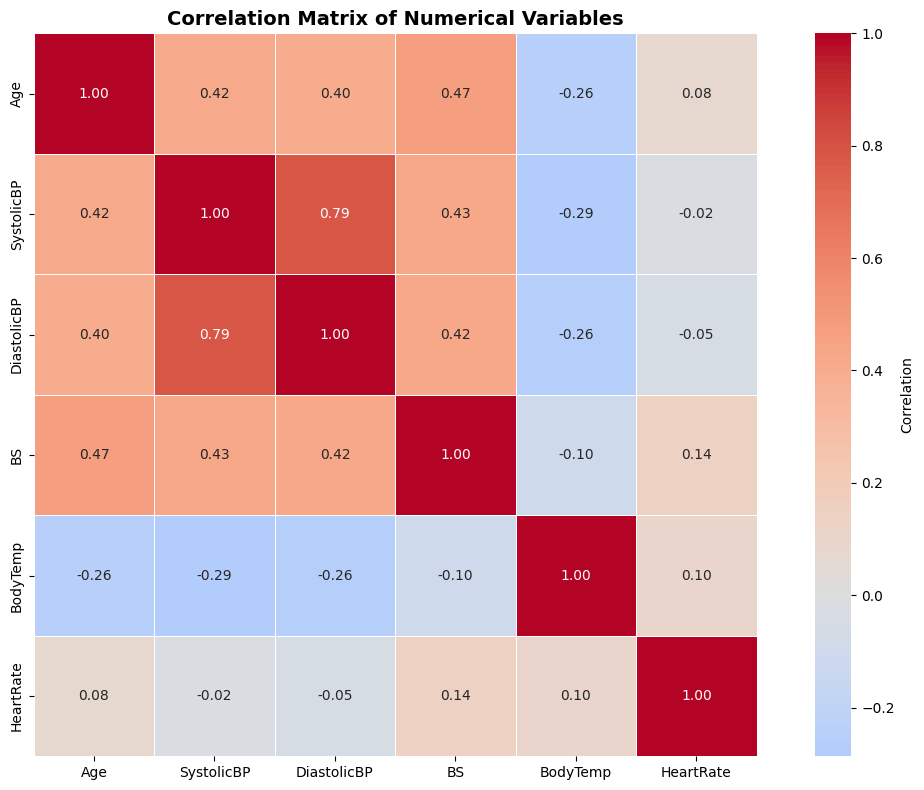


Strong correlations (|r| > 0.5):
SystolicBP <-> DiastolicBP: 0.787


In [4]:
# Calculate correlation matrix for numerical variables
correlation_matrix = df[numerical_cols].corr()

print("Correlation Matrix:")
print(correlation_matrix)

# Visualize correlation matrix with heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            cbar_kws={'label': 'Correlation'}, square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Identify strong correlations (excluding diagonal)
print("\nStrong correlations (|r| > 0.5):")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.5:
            print(f"{correlation_matrix.columns[i]} <-> {correlation_matrix.columns[j]}: {correlation_matrix.iloc[i, j]:.3f}")

## Conclusions

This exploratory data analysis (EDA) has provided insights into:

 The analysis revealed that SystolicBP (Systolic Blood Pressure) and DiastolicBP (Diastolic Blood Pressure) exhibit the strongest correlation among the numerical variables. This makes intuitive sense, as these two measures are physiologically related and tend to change together. Given this strong relationship, these variables will be prioritized during the model training phase as they are expected to be highly predictive features for maternal health risk classification.

These insights will guide the machine learning model development and feature engineering process, with particular attention to the blood pressure measurements as key indicators for predicting maternal health risk levels.